In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

## ALl three features

In [8]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data.xlsx')
final_data = data[['Left Eye Closure', 'Right Eye Closure', 'Left_Long_Blink_Ratio','Right_Long_Blink_Ratio','Left Eye BN','Right Eye BN', 'label']]
final_data.head()

,Left Eye Closure,Right Eye Closure,Left_Long_Blink_Ratio,Right_Long_Blink_Ratio,Left Eye BN,Right Eye BN,label
0,0.989899,0.616162,0.500000,0.250000,0.713669,0.683386,1
1,0.957672,0.984127,0.444444,0.222222,0.712984,0.553626,1
2,0.228571,0.314286,0.000000,0.333333,0.833156,0.712008,1
3,0.558621,0.717241,0.169231,0.215385,0.672806,0.640788,1
4,0.992679,0.985359,0.571429,0.571429,0.608009,0.501777,1


In [9]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)


# Standardize the data
scaler = StandardScaler()

# Define models to test
models = {
    'RandomForest': RandomForestClassifier(max_depth=10, n_estimators=200),
    'SVM': SVC(gamma=0.1, kernel='rbf'),
    'LogisticRegression': LogisticRegression(C=10, solver='liblinear'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(max_depth=30),
    'MLP': MLPClassifier(activation='relu', hidden_layer_sizes=(100,), solver='sgd', max_iter=2000),
    'XGBoost': XGBClassifier(learning_rate=0.1,n_estimators=100)
}

# Create a pipeline for each model and use regularized cross-validation to evaluate the model

pipelines = {name: Pipeline([('scaler', scaler), ('model', model)]) for name, model in models.items()}


In [11]:
# Example parameter grids (customize these based on your requirements)
param_grids = {
    'RandomForest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30]
    },
    'SVM': {
        'model__C': [0.1, 1, 10,100,150],
        'model__gamma': [1, 0.1, 0.01],
        'model__kernel': ['rbf', 'linear']
    },
    'LogisticRegression': {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'AdaBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 1]
    },
    'MLP': {
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam', 'sgd']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 1]
    }
}

In [12]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': None, 'model__n_estimators': 200}
RandomForest best score: 0.9528138528138528
SVM best parameters: {'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
SVM best score: 0.9684415584415583
LogisticRegression best parameters: {'model__C': 0.1, 'model__solver': 'saga'}
LogisticRegression best score: 0.9637229437229438
KNN best parameters: {'model__n_neighbors': 3, 'model__weights': 'uniform'}
KNN best score: 0.962857142857143
DecisionTree best parameters: {'model__max_depth': 10, 'model__min_samples_split': 2}
DecisionTree best score: 0.9203030303030303
MLP best parameters: {'model__activation': 'tanh', 'model__hidden_layer_sizes': (50,), 'model__solver': 'sgd'}
MLP best score: 0.9554978354978354
XGBoost best parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
XGBoost best score: 0.9573160173160172


Evaluation for RandomForest:
Accuracy: 0.9444444444444444
Precision: 0.9494949494949494
Recall: 0.9444444444444444
F1 Score: 0.9439153439153439


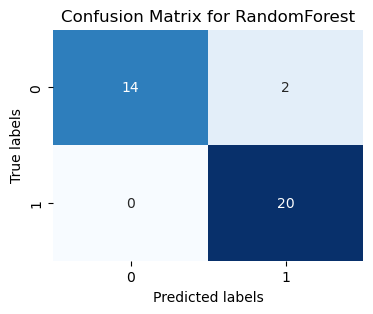

Evaluation for SVM:
Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444


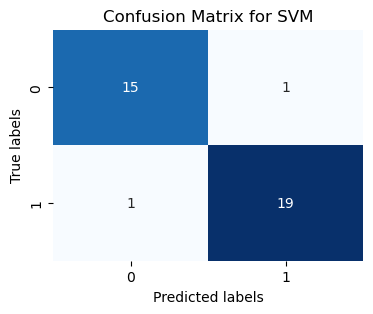

Evaluation for LogisticRegression:
Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444


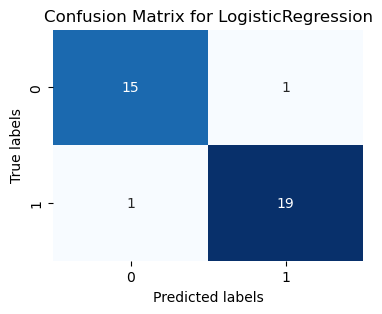

Evaluation for KNN:
Accuracy: 0.9444444444444444
Precision: 0.9506172839506173
Recall: 0.9444444444444444
F1 Score: 0.9446164430684555


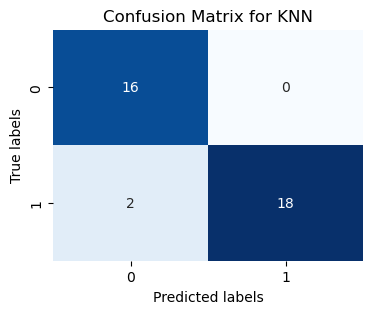

Evaluation for DecisionTree:
Accuracy: 0.9166666666666666
Precision: 0.9174603174603173
Recall: 0.9166666666666666
F1 Score: 0.9163388408077628


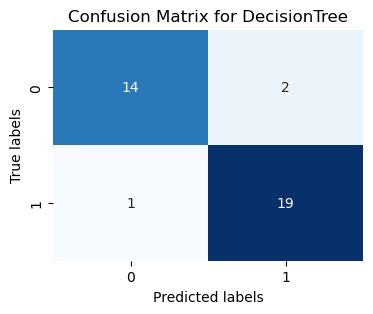

Evaluation for MLP:
Accuracy: 0.9166666666666666
Precision: 0.9174603174603173
Recall: 0.9166666666666666
F1 Score: 0.9163388408077628


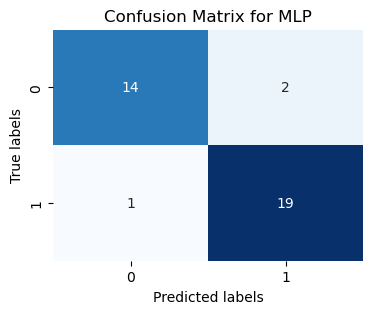

Evaluation for XGBoost:
Accuracy: 0.9166666666666666
Precision: 0.9174603174603173
Recall: 0.9166666666666666
F1 Score: 0.9163388408077628


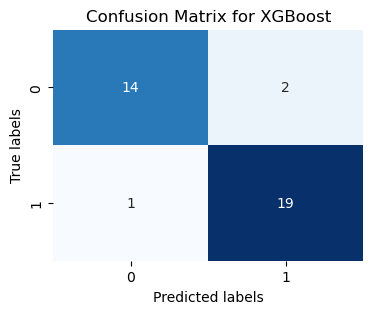

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)


## Eye closure only

In [10]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data2.xlsx')
final_data = data[['Left Eye Closure', 'Right Eye Closure', 'label']]
final_data.head()

,Left Eye Closure,Right Eye Closure,label
0,0.989899,0.616162,1
1,0.957672,0.984127,1
2,0.228571,0.314286,1
3,0.558621,0.717241,1
4,0.248902,0.144949,1


In [11]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': 20, 'model__n_estimators': 300}
RandomForest best score: 0.8582251082251082
SVM best parameters: {'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
SVM best score: 0.9025974025974025
LogisticRegression best parameters: {'model__C': 1, 'model__solver': 'liblinear'}
LogisticRegression best score: 0.8935064935064936
KNN best parameters: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
KNN best score: 0.8666666666666665
DecisionTree best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10}
DecisionTree best score: 0.8518614718614718
MLP best parameters: {'model__activation': 'relu', 'model__hidden_layer_sizes': (50,), 'model__solver': 'sgd'}
MLP best score: 0.8924675324675324
XGBoost best parameters: {'model__learning_rate': 1, 'model__n_estimators': 300}
XGBoost best score: 0.8676190476190474


Evaluation for RandomForest:
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7777777777777779


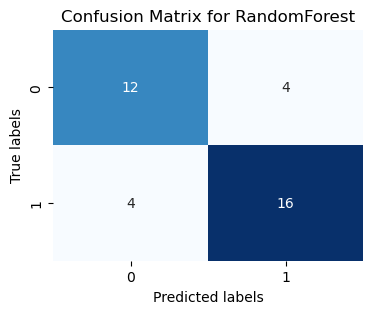

Evaluation for SVM:
Accuracy: 0.8055555555555556
Precision: 0.8176814585483316
Recall: 0.8055555555555556
F1 Score: 0.8060060060060059


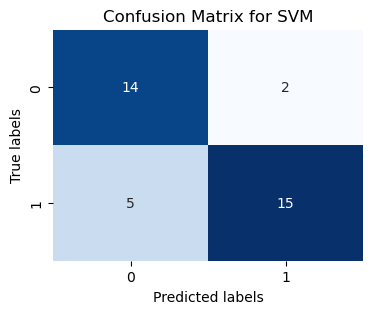

Evaluation for LogisticRegression:
Accuracy: 0.8333333333333334
Precision: 0.8395061728395061
Recall: 0.8333333333333334
F1 Score: 0.8338493292053665


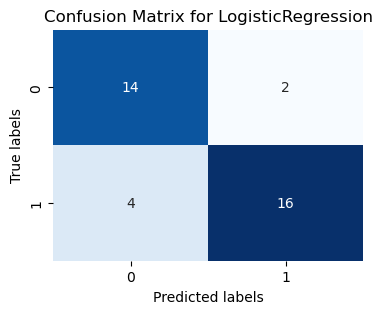

Evaluation for KNN:
Accuracy: 0.8333333333333334
Precision: 0.8395061728395061
Recall: 0.8333333333333334
F1 Score: 0.8338493292053665


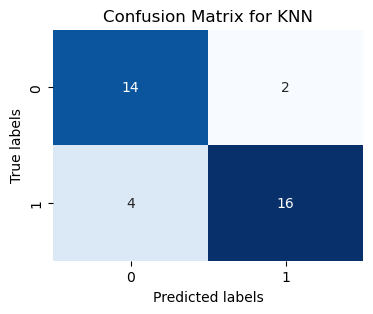

Evaluation for DecisionTree:
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7777777777777779


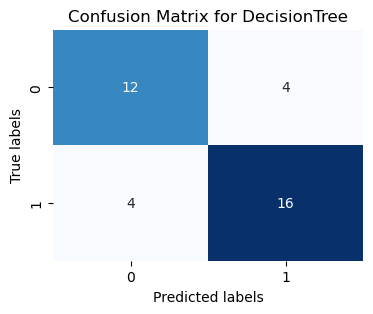

Evaluation for MLP:
Accuracy: 0.8055555555555556
Precision: 0.8176814585483316
Recall: 0.8055555555555556
F1 Score: 0.8060060060060059


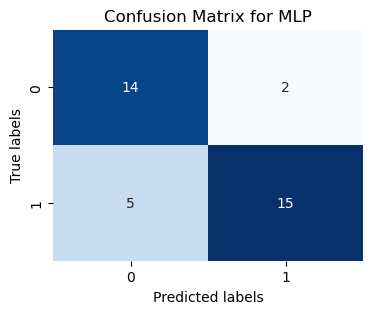

Evaluation for XGBoost:
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7777777777777779


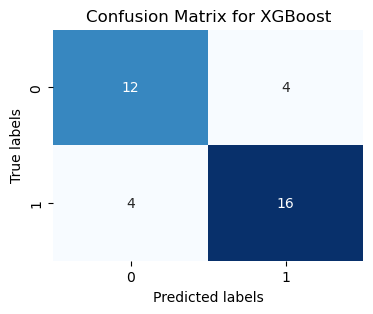

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)


## Long Blink Only

In [14]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data.xlsx')
final_data = data[['Left_Long_Blink_Ratio','Right_Long_Blink_Ratio', 'label']]
final_data.head()

,Left_Long_Blink_Ratio,Right_Long_Blink_Ratio,label
0,0.500000,0.250000,1
1,0.444444,0.222222,1
2,0.000000,0.333333,1
3,0.169231,0.215385,1
4,0.571429,0.571429,1


In [15]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
RandomForest best score: 0.7902164502164502
SVM best parameters: {'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'rbf'}
SVM best score: 0.8215151515151514
LogisticRegression best parameters: {'model__C': 10, 'model__solver': 'liblinear'}
LogisticRegression best score: 0.8198268398268398
KNN best parameters: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
KNN best score: 0.8205194805194804
DecisionTree best parameters: {'model__max_depth': 30, 'model__min_samples_split': 10}
DecisionTree best score: 0.7939393939393937
MLP best parameters: {'model__activation': 'relu', 'model__hidden_layer_sizes': (100,), 'model__solver': 'adam'}
MLP best score: 0.8206926406926407
XGBoost best parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 100}
XGBoost best score: 0.8389177489177488


Evaluation for RandomForest:
Accuracy: 0.8055555555555556
Precision: 0.8108509847640283
Recall: 0.8055555555555556
F1 Score: 0.8022810300276219


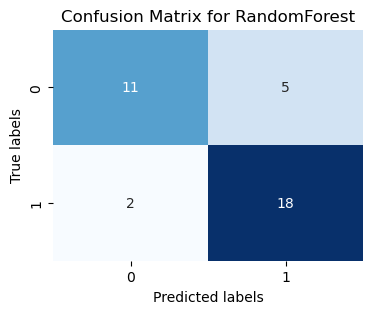

Evaluation for SVM:
Accuracy: 0.8333333333333334
Precision: 0.8354978354978354
Recall: 0.8333333333333334
F1 Score: 0.8317460317460318


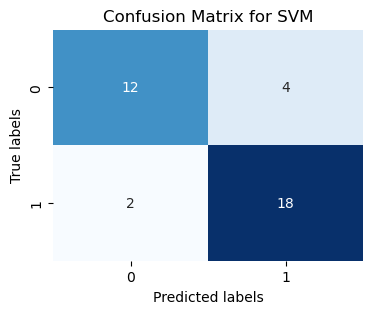

Evaluation for LogisticRegression:
Accuracy: 0.8333333333333334
Precision: 0.8354978354978354
Recall: 0.8333333333333334
F1 Score: 0.8317460317460318


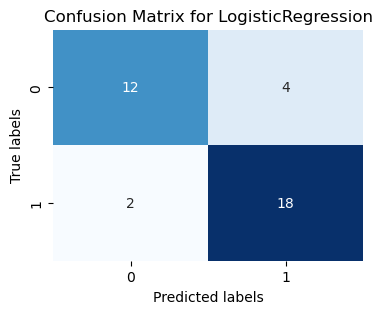

Evaluation for KNN:
Accuracy: 0.8333333333333334
Precision: 0.8354978354978354
Recall: 0.8333333333333334
F1 Score: 0.8317460317460318


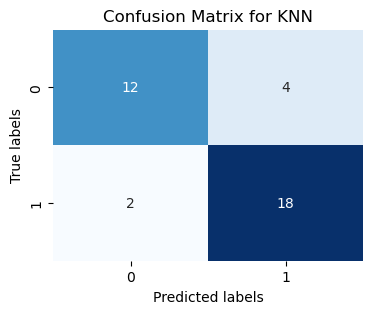

Evaluation for DecisionTree:
Accuracy: 0.8055555555555556
Precision: 0.8108509847640283
Recall: 0.8055555555555556
F1 Score: 0.8022810300276219


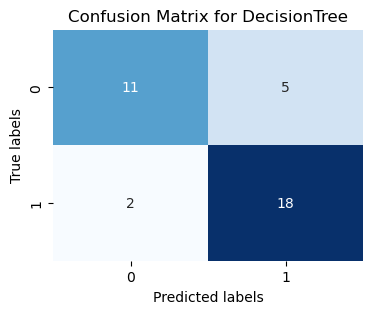

Evaluation for MLP:
Accuracy: 0.8333333333333334
Precision: 0.8354978354978354
Recall: 0.8333333333333334
F1 Score: 0.8317460317460318


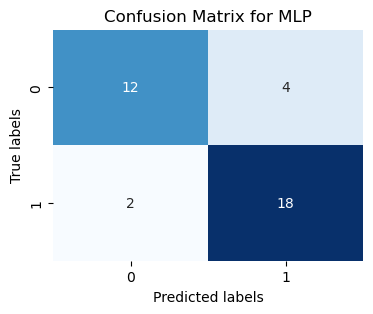

Evaluation for XGBoost:
Accuracy: 0.8333333333333334
Precision: 0.8354978354978354
Recall: 0.8333333333333334
F1 Score: 0.8317460317460318


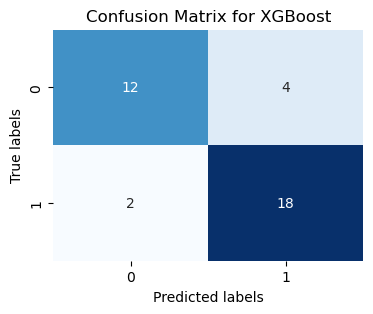

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)


## BN Only

In [18]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data.xlsx')
final_data = data[['Left Eye BN','Right Eye BN', 'label']]
final_data.head()

,Left Eye BN,Right Eye BN,label
0,0.713669,0.683386,1
1,0.712984,0.553626,1
2,0.833156,0.712008,1
3,0.672806,0.640788,1
4,0.608009,0.501777,1


In [19]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
RandomForest best score: 0.8628138528138528
SVM best parameters: {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
SVM best score: 0.8519913419913417
LogisticRegression best parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}
LogisticRegression best score: 0.8454978354978355
KNN best parameters: {'model__n_neighbors': 3, 'model__weights': 'uniform'}
KNN best score: 0.8592207792207793
DecisionTree best parameters: {'model__max_depth': None, 'model__min_samples_split': 10}
DecisionTree best score: 0.8563203463203461
MLP best parameters: {'model__activation': 'tanh', 'model__hidden_layer_sizes': (100,), 'model__solver': 'adam'}
MLP best score: 0.849134199134199
XGBoost best parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 300}
XGBoost best score: 0.8581818181818182


Evaluation for RandomForest:
Accuracy: 0.6944444444444444
Precision: 0.7195767195767195
Recall: 0.6944444444444444
F1 Score: 0.6932646932646933


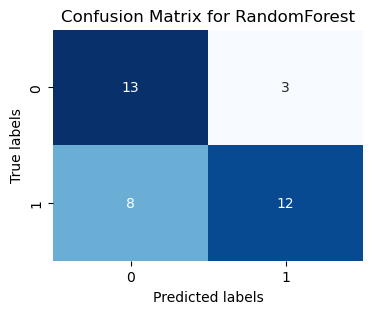

Evaluation for SVM:
Accuracy: 0.6666666666666666
Precision: 0.7222222222222222
Recall: 0.6666666666666666
F1 Score: 0.6583333333333334


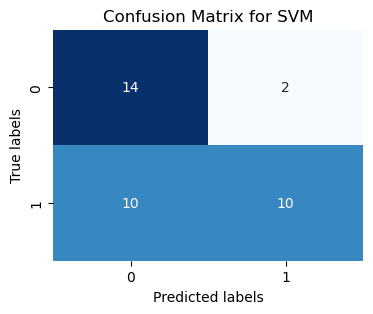

Evaluation for LogisticRegression:
Accuracy: 0.6666666666666666
Precision: 0.7222222222222222
Recall: 0.6666666666666666
F1 Score: 0.6583333333333334


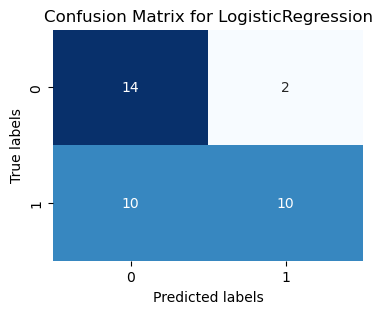

Evaluation for KNN:
Accuracy: 0.6666666666666666
Precision: 0.7222222222222222
Recall: 0.6666666666666666
F1 Score: 0.6583333333333334


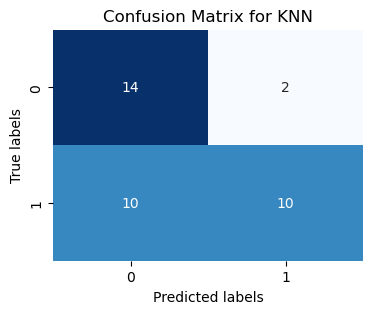

Evaluation for DecisionTree:
Accuracy: 0.7222222222222222
Precision: 0.7402777777777777
Recall: 0.7222222222222222
F1 Score: 0.7222222222222223


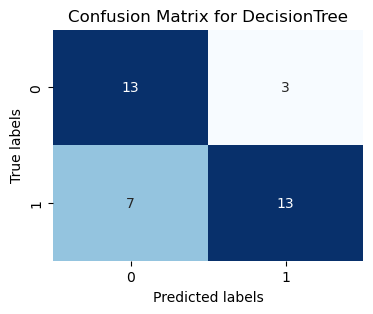

Evaluation for MLP:
Accuracy: 0.6388888888888888
Precision: 0.7034343434343434
Recall: 0.6388888888888888
F1 Score: 0.6261036803916427


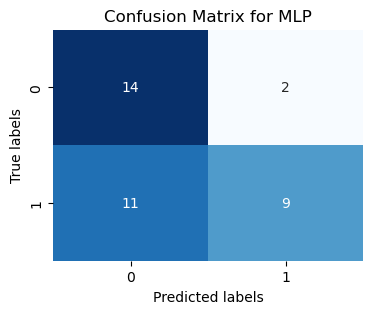

Evaluation for XGBoost:
Accuracy: 0.6944444444444444
Precision: 0.7195767195767195
Recall: 0.6944444444444444
F1 Score: 0.6932646932646933


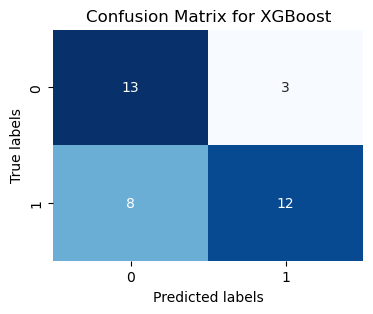

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)


## Eye Closure + Blink Long Ratio

In [22]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data2.xlsx')
final_data = data[['Left Eye Closure', 'Right Eye Closure', 'Left_Long_Blink_Ratio','Right_Long_Blink_Ratio','label']]
final_data.head()

,Left Eye Closure,Right Eye Closure,Left_Long_Blink_Ratio,Right_Long_Blink_Ratio,label
0,0.989899,0.616162,0.500000,0.250000,1
1,0.957672,0.984127,0.444444,0.222222,1
2,0.228571,0.314286,0.000000,0.333333,1
3,0.558621,0.717241,0.169231,0.215385,1
4,0.248902,0.144949,0.571429,0.571429,1


In [23]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': None, 'model__n_estimators': 100}
RandomForest best score: 0.8852380952380954
SVM best parameters: {'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'rbf'}
SVM best score: 0.9159307359307358
LogisticRegression best parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}
LogisticRegression best score: 0.9083982683982684
KNN best parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
KNN best score: 0.9029004329004329
DecisionTree best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10}
DecisionTree best score: 0.8721645021645023
MLP best parameters: {'model__activation': 'relu', 'model__hidden_layer_sizes': (100,), 'model__solver': 'sgd'}
MLP best score: 0.9166233766233767
XGBoost best parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
XGBoost best score: 0.8851082251082251


Evaluation for RandomForest:
Accuracy: 0.9166666666666666
Precision: 0.9174603174603173
Recall: 0.9166666666666666
F1 Score: 0.9163388408077628


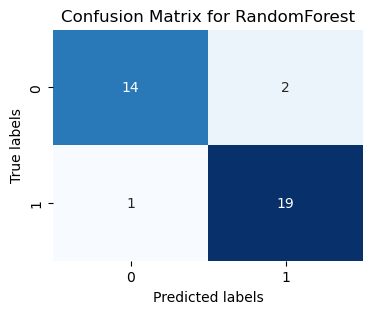

Evaluation for SVM:
Accuracy: 0.9166666666666666
Precision: 0.927536231884058
Recall: 0.9166666666666666
F1 Score: 0.9152632985832665


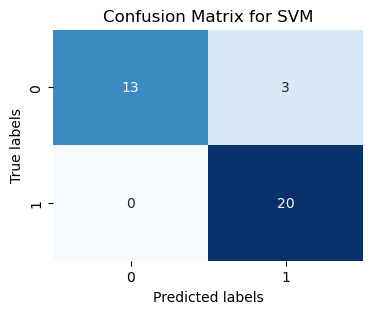

Evaluation for LogisticRegression:
Accuracy: 0.8611111111111112
Precision: 0.8630890952872377
Recall: 0.8611111111111112
F1 Score: 0.8614348614348616


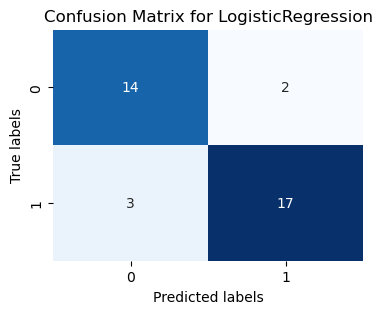

Evaluation for KNN:
Accuracy: 0.8333333333333334
Precision: 0.8395061728395061
Recall: 0.8333333333333334
F1 Score: 0.8338493292053665


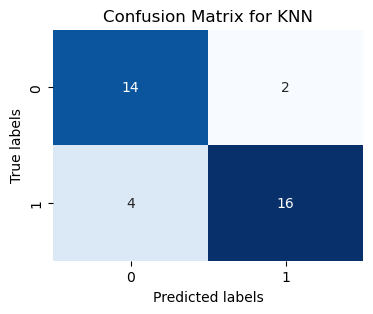

Evaluation for DecisionTree:
Accuracy: 0.8611111111111112
Precision: 0.8630890952872377
Recall: 0.8611111111111112
F1 Score: 0.8614348614348616


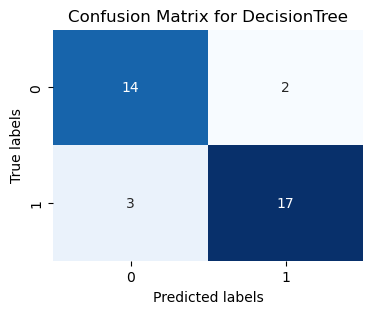

Evaluation for MLP:
Accuracy: 0.9166666666666666
Precision: 0.9174603174603173
Recall: 0.9166666666666666
F1 Score: 0.9163388408077628


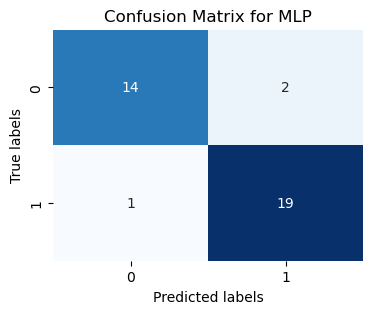

Evaluation for XGBoost:
Accuracy: 0.9166666666666666
Precision: 0.9174603174603173
Recall: 0.9166666666666666
F1 Score: 0.9163388408077628


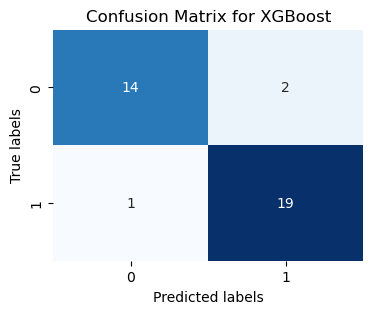

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)


## Eye Closure + BN

In [26]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data2.xlsx')
final_data = data[['Left Eye Closure', 'Right Eye Closure', 'Left Eye BN','Right Eye BN', 'label']]
final_data.head()

,Left Eye Closure,Right Eye Closure,Left Eye BN,Right Eye BN,label
0,0.989899,0.616162,0.713669,0.683386,1
1,0.957672,0.984127,0.712984,0.553626,1
2,0.228571,0.314286,0.833156,0.712008,1
3,0.558621,0.717241,0.672806,0.640788,1
4,0.248902,0.144949,0.608009,0.501777,1


In [27]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': None, 'model__n_estimators': 300}
RandomForest best score: 0.9046753246753245
SVM best parameters: {'model__C': 1, 'model__gamma': 1, 'model__kernel': 'rbf'}
SVM best score: 0.914069264069264
LogisticRegression best parameters: {'model__C': 10, 'model__solver': 'liblinear'}
LogisticRegression best score: 0.9008225108225106
KNN best parameters: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
KNN best score: 0.9242424242424243
DecisionTree best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10}
DecisionTree best score: 0.8515584415584415
MLP best parameters: {'model__activation': 'relu', 'model__hidden_layer_sizes': (100,), 'model__solver': 'adam'}
MLP best score: 0.9103463203463202
XGBoost best parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 300}
XGBoost best score: 0.8990476190476191


Evaluation for RandomForest:
Accuracy: 0.7777777777777778
Precision: 0.7839506172839505
Recall: 0.7777777777777778
F1 Score: 0.7784657722738217


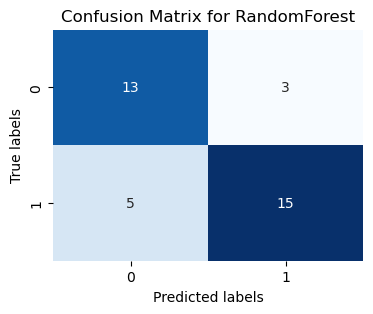

Evaluation for SVM:
Accuracy: 0.8333333333333334
Precision: 0.8395061728395061
Recall: 0.8333333333333334
F1 Score: 0.8338493292053665


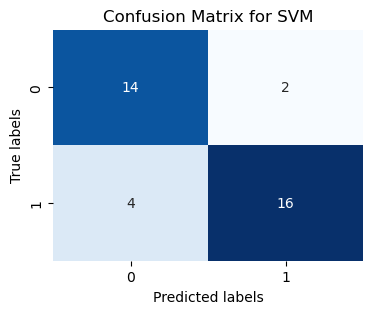

Evaluation for LogisticRegression:
Accuracy: 0.8055555555555556
Precision: 0.8176814585483316
Recall: 0.8055555555555556
F1 Score: 0.8060060060060059


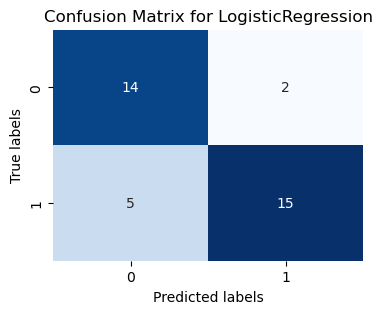

Evaluation for KNN:
Accuracy: 0.8333333333333334
Precision: 0.8787878787878788
Recall: 0.8333333333333334
F1 Score: 0.8317853457172342


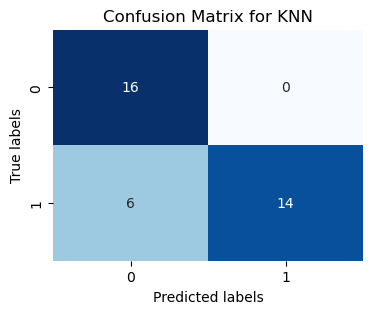

Evaluation for DecisionTree:
Accuracy: 0.8333333333333334
Precision: 0.8541666666666666
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


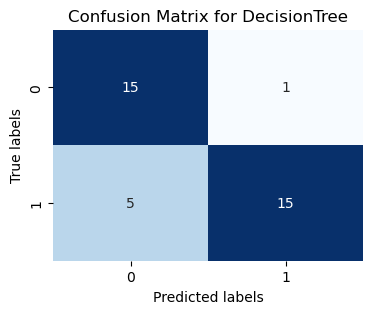

Evaluation for MLP:
Accuracy: 0.8055555555555556
Precision: 0.8176814585483316
Recall: 0.8055555555555556
F1 Score: 0.8060060060060059


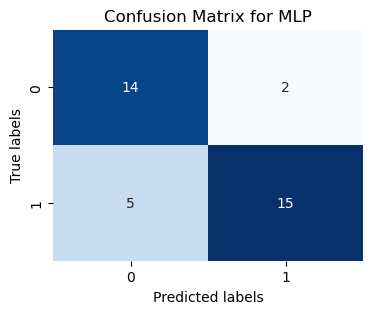

Evaluation for XGBoost:
Accuracy: 0.7777777777777778
Precision: 0.7839506172839505
Recall: 0.7777777777777778
F1 Score: 0.7784657722738217


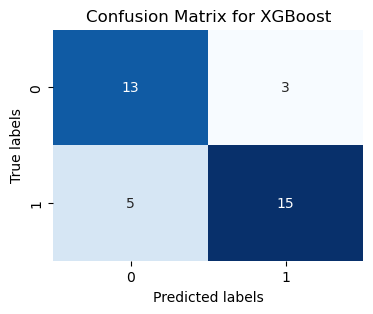

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)


## Blink Ratio + BN

In [30]:
data = pd.read_excel(r'C:\\Users\\harsh\\Downloads\\used_feature_data.xlsx')
final_data = data[[ 'Left_Long_Blink_Ratio','Right_Long_Blink_Ratio','Left Eye BN','Right Eye BN', 'label']]
final_data.head()

,Left_Long_Blink_Ratio,Right_Long_Blink_Ratio,Left Eye BN,Right Eye BN,label
0,0.500000,0.250000,0.713669,0.683386,1
1,0.444444,0.222222,0.712984,0.553626,1
2,0.000000,0.333333,0.833156,0.712008,1
3,0.169231,0.215385,0.672806,0.640788,1
4,0.571429,0.571429,0.608009,0.501777,1


In [31]:
# Split the dataset into training and testing sets as X_train, X_test, y_train, y_test
X = final_data.drop('label', axis=1)
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
# Perform GridSearchCV for each model
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=rkf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best score: {grid_search.best_score_}')

RandomForest best parameters: {'model__max_depth': 30, 'model__n_estimators': 100}
RandomForest best score: 0.8797402597402596
SVM best parameters: {'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
SVM best score: 0.8725108225108223
LogisticRegression best parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}
LogisticRegression best score: 0.8705194805194805
KNN best parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
KNN best score: 0.8741125541125541
DecisionTree best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10}
DecisionTree best score: 0.8424675324675325
MLP best parameters: {'model__activation': 'tanh', 'model__hidden_layer_sizes': (50,), 'model__solver': 'sgd'}
MLP best score: 0.8714718614718615
XGBoost best parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 200}
XGBoost best score: 0.8805194805194803


Evaluation for RandomForest:
Accuracy: 0.6944444444444444
Precision: 0.7195767195767195
Recall: 0.6944444444444444
F1 Score: 0.6932646932646933


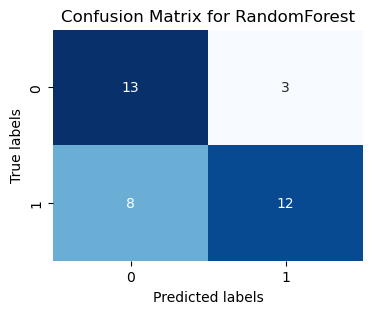

Evaluation for SVM:
Accuracy: 0.6666666666666666
Precision: 0.6991341991341992
Recall: 0.6666666666666666
F1 Score: 0.6635706914344686


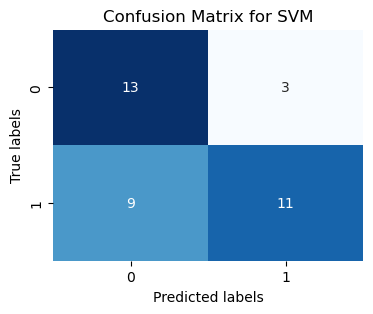

Evaluation for LogisticRegression:
Accuracy: 0.6944444444444444
Precision: 0.7195767195767195
Recall: 0.6944444444444444
F1 Score: 0.6932646932646933


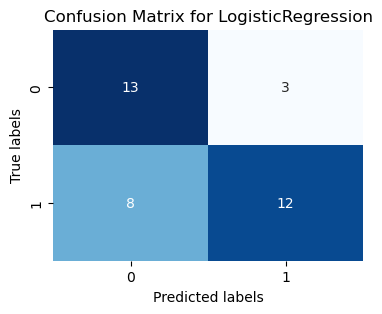

Evaluation for KNN:
Accuracy: 0.6666666666666666
Precision: 0.6991341991341992
Recall: 0.6666666666666666
F1 Score: 0.6635706914344686


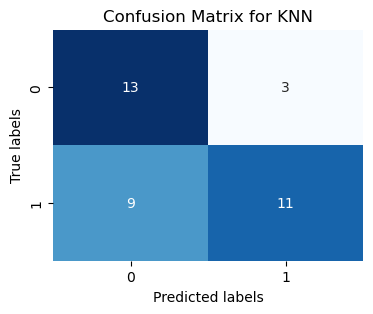

Evaluation for DecisionTree:
Accuracy: 0.6944444444444444
Precision: 0.7195767195767195
Recall: 0.6944444444444444
F1 Score: 0.6932646932646933


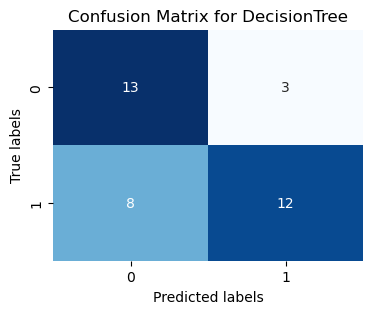

Evaluation for MLP:
Accuracy: 0.6666666666666666
Precision: 0.6991341991341992
Recall: 0.6666666666666666
F1 Score: 0.6635706914344686


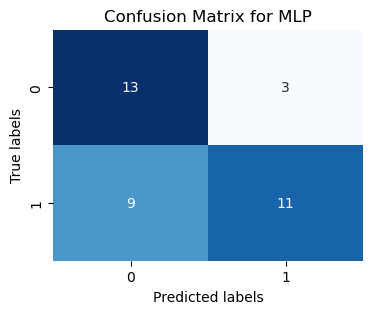

Evaluation for XGBoost:
Accuracy: 0.6944444444444444
Precision: 0.7195767195767195
Recall: 0.6944444444444444
F1 Score: 0.6932646932646933


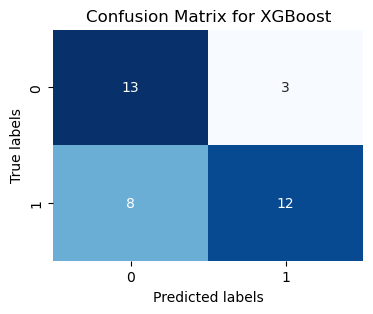

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Plot confusion matrix
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate each best model
for name, model in best_estimators.items():
    evaluate_model(name, model, X_test, y_test)
